In [57]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

### Preparing Data

In [58]:
data = pd.read_csv("fashion-mnist_train.csv")
data.head(n=10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [59]:
train = data.values
x = train[:,1:]
y = train[:,0]
print(type(train))
print(train.shape)
print(train[:5,])

<class 'numpy.ndarray'>
(60000, 785)
[[2 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [3 0 0 ... 0 0 0]]


In [60]:
x.shape

(60000, 784)

### Visualising Data

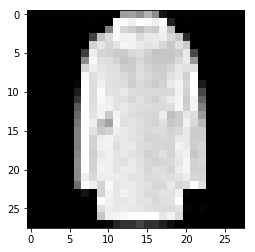

In [61]:
first = x[6]
first = first.reshape((28,28))
plt.imshow(first,cmap='gray')

In [62]:
train = sorted(train, key = lambda x:x[0])
train = np.array(train)
print(train.shape)
print(train[:5,])

(60000, 785)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [63]:
i = train[:,0]
print(i.shape)
print(i[-1])
i.reshape(60000,1)
print(i)

(60000,)
9
[0 0 0 ... 9 9 9]


### Labelling and storing in lists

In [64]:
def idex(i,num):
    return list(i).index(num)


In [65]:
classes = list()
labels = list()
print(i[-1])


9


In [66]:
def construct():
    t = int()
    prev = 0
    for z in range(1,10):
        t = idex(i,z)
        temp = train[prev:t,1:]
        temp2 = train[prev:t,0]
        labels.append(temp2)
        print(temp.shape)
        classes.append(temp)
        prev = t
    temp = train[t:,1:]
    temp2= train[t:,0]
    labels.append(temp)
    classes.append(temp)

construct()
print(classes[8].shape)

(6000, 784)
(6000, 784)
(6000, 784)
(6000, 784)
(6000, 784)
(6000, 784)
(6000, 784)
(6000, 784)
(6000, 784)
(6000, 784)


In [72]:
print(classes[4])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [68]:
t1 = np.array([[1],[2],[3]])
print(t1.shape)
h = np.append([[0],[1]],[[1, 2, 3], [4, 5, 6]], axis=1)
print(h)

(3, 1)
[[0 1 2 3]
 [1 4 5 6]]


### Algorithm and Results

In [69]:
# Algorithm
def hypothesis(x,theta,bias):
    result = bias + np.dot(x,theta)
    return sigmoid(result)

def sigmoid(a):
    return 1.0/(1.0 + np.exp(-1.0*a))   # Use floats for accurate results

def error(x,theta,y,bias):
    it = x.shape[0]
    e = 0.0
    for i in range(it):
        h = hypothesis(x[i],theta,bias)
        e += y[i]*np.log2(h) + (1-y[i])*np.log2(1-h)
    return -e/it

def grad(x,y,theta,bias,batch_size = 1):
    it = x.shape[0]
    indices = np.arange(it)
    np.random.shuffle(indices)
    indices = indices[:batch_size]
    g =  np.zeros(theta.shape)
    g_b = 0.0
    for i in indices:
        h = hypothesis(x[i],theta,bias)
        g += (y[i] - h)*x[i]
        g_b += (y[i] - h)
    g /= it
    g_b /= it
    return (g,g_b)

def grad_des(x,y,theta,bias,learning_rate = 0.1):
    e =  error(x,theta,y,bias)
    g,g_b = grad(x,y,theta,bias)
    theta = theta + learning_rate*g
    bias = bias + learning_rate*g_b
    return theta,bias

def predict(x,theta,bias):
    
    confidence = hypothesis(x,theta,bias)
    if confidence<0.5:
        return 0
    else:
        return 1

In [70]:
# print(labels[1])
print(labels[1].shape)


(6000,)


In [71]:
theta1 = np.random.random((classes[0].shape[1],))
print(theta1)
bias1 = np.random.random()

[0.59766942 0.68320625 0.57987808 0.21506004 0.1468098  0.42166382
 0.77025461 0.13041829 0.16576481 0.32703255 0.06389851 0.90497682
 0.24523706 0.66749691 0.82038601 0.20900682 0.60634571 0.1199293
 0.95364726 0.73164174 0.34398183 0.59499816 0.04830563 0.60462672
 0.68704043 0.9700323  0.76892483 0.41510603 0.78058748 0.32313881
 0.67042549 0.04489424 0.3594806  0.12135576 0.04892088 0.83823066
 0.42850358 0.17085916 0.23035251 0.61942595 0.92610783 0.56114384
 0.85786609 0.99979069 0.99856613 0.79344416 0.12187212 0.41264532
 0.2056986  0.44863852 0.05053488 0.45040641 0.35608518 0.10064201
 0.88747369 0.27740507 0.64590414 0.33615907 0.96055097 0.55914277
 0.40637583 0.22232812 0.84189148 0.56404355 0.38074502 0.17968047
 0.29492436 0.22348878 0.49725011 0.73546173 0.8160854  0.77646195
 0.91809518 0.18434775 0.03429712 0.76717608 0.7654227  0.14440351
 0.79268653 0.08586016 0.90472518 0.21601339 0.75017814 0.94712683
 0.46925684 0.04643351 0.13303639 0.68029791 0.28561984 0.70594

In [73]:
lr = LogisticRegression()
lr.fit(x1,y1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### 3 and 4 (optional)

In [83]:
x1 = np.concatenate((classes[3],classes[4]))
y1 = np.concatenate((labels[0],labels[1]))
xtest = train[1005,1:].reshape(1,-1)
lr = LogisticRegression()
lr.fit(x1,y1)
lr.predict(xtest)

array([0])

### 2 and 3 (optional)

In [76]:
x1 = np.concatenate((classes[2],classes[3]))
y1 = np.concatenate((labels[0],labels[1]))
lr = LogisticRegression()
lr.fit(x1,y1)
lr.predict(xtest)

array([1])

### ALL POSSIBLE COMBINATIONS

In [77]:
result = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}
op = 0
for i in range(9):
    for j in range(i+1,10):
        op+=1
        x1 = np.concatenate((classes[i],classes[j]))
        y1 = np.concatenate((labels[0],labels[1]))
        lr = LogisticRegression()
        lr.fit(x1,y1)
#       xtest = x1[1005,:].reshape(1,-1)
        t = lr.predict(xtest)
        if t[0] == 0:
            result[i]+=1
        else:
            result[j]+=1




In [78]:
print(result)
print("Number of combinations checked = {0}".format(op))

{0: 5, 1: 4, 2: 6, 3: 8, 4: 6, 5: 1, 6: 9, 7: 2, 8: 4, 9: 0}
Number of combinations checked = 45


In [79]:
max_label = max(result,key = lambda x:result[x])
print(max_label)


6


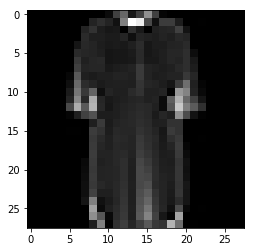

In [81]:
first = xtest
first = first.reshape((28,28))
plt.imshow(first,cmap='gray')